## Multiple Correspondence Analysis

In [1]:
import matplotlib.pyplot as plt
import networkit as nk
import networkx as nx
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from fast_pagerank import pagerank
from fast_pagerank import pagerank_power
from scipy import sparse
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import rbf_kernel, cosine_similarity

from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import rbf_kernel, cosine_similarity
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MultiLabelBinarizer
from sklearn.random_projection import GaussianRandomProjection

import utils

In [2]:
# Load data
df_data = pd.read_csv('../data/ice-cat-office-products.csv.gz', dtype=str, index_col=0)

In [3]:
# top_categories = utils.find_top_n_categories(df_data, top_n=10)
top_categories = [
     'Folders',                         # N=645
#     'Self-Adhesive Labels',            # N=324
#     'Multimedia Carts & Stands',       # N=317
#     'Calculators',                     # N=305
#     'Writing Notebooks'                # N=300
     'Ring Binders',                    # N=298
#     'Printer Cabinets & Stands',       # N=252
#     'Whiteboards',                     # N=232
#     'Fax Machines',                    # N=210
#     'File Storage Boxes'               # N=192
]
# top_categories = utils.find_top_n_categories(df_data, top_n=3)
df_data = df_data[df_data.category_name.isin(top_categories)]

df_data.sort_values('category_name', inplace=True)

In [4]:
X_raw = utils.preprocess_dataframe(df_data)

In [5]:
X_pca = PCA(n_components=0.9).fit_transform(X_raw)

In [6]:
X_with_mca = utils.preprocess_dataframe_with_correspondence_analysis(df_data)

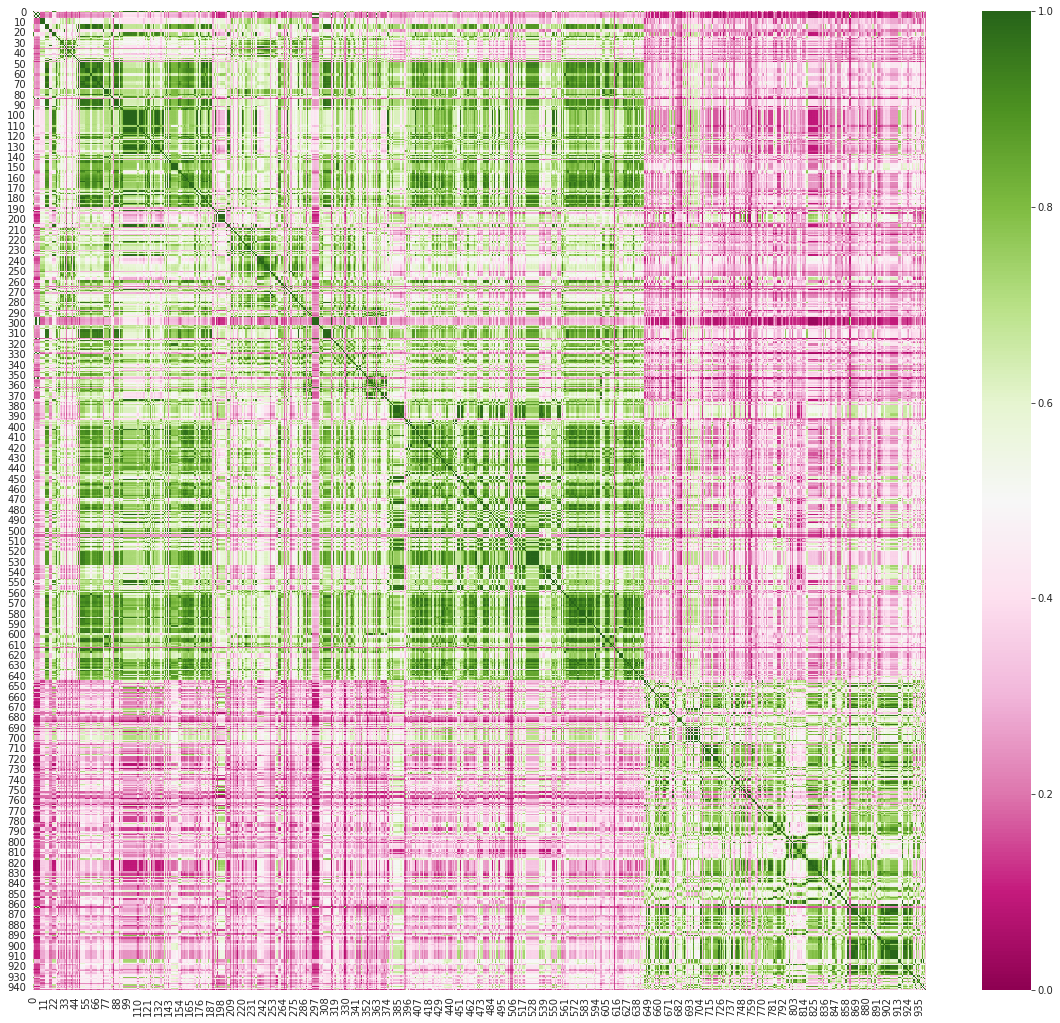

In [7]:
utils.plot_similarity_heatmap(X_with_mca, metric='cosine', normalise=True)

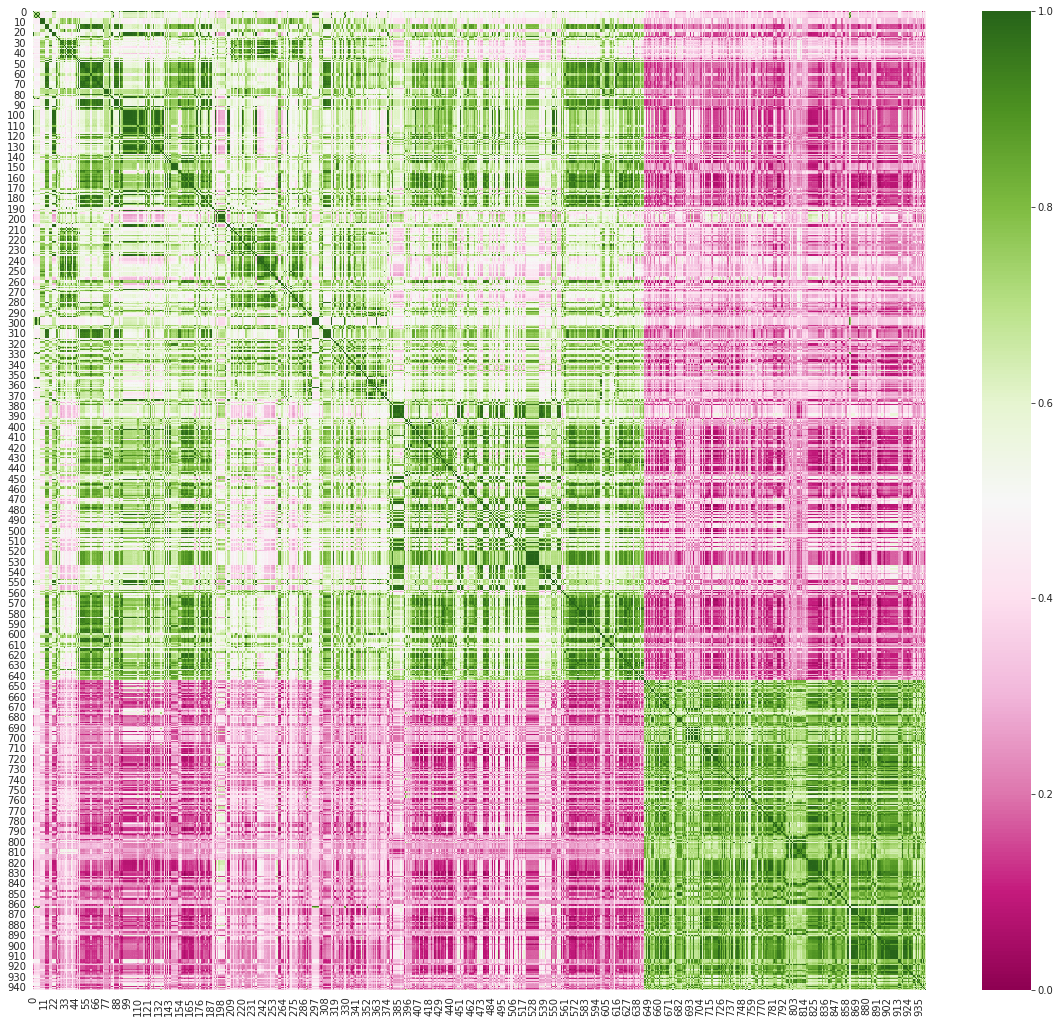

In [8]:
utils.plot_similarity_heatmap(X_pca, metric='cosine', normalise=True)